<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Deep-Learning-Projects/blob/main/Kuzushiji-MNIST%20Classifier%20AlexNet%20LeNet5/KMNIST_Classification_CustomAlexNet_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import requests
from tqdm import tqdm

# Download KMNIST

In [2]:
# Below code taken from KMNIST github repository addressed below
# kmnist : https://github.com/rois-codh/kmnist

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 2
Please select a download option:
1) NumPy data format (.npz)
> 1


100%|██████████| 64569/64569 [00:49<00:00, 1293.87KB/s]


100%|██████████| 161/161 [00:00<00:00, 241.69KB/s]


100%|██████████| 10715/10715 [00:12<00:00, 892.35KB/s]


100%|██████████| 27/27 [00:00<00:00, 123.04KB/s]

All dataset files downloaded!


# Load Images

In [3]:
# Load the images and labels
train_images = np.load('k49-train-imgs.npz')['arr_0']
train_labels = np.load('k49-train-labels.npz')['arr_0']
test_images = np.load('k49-test-imgs.npz')['arr_0']
test_labels = np.load('k49-test-labels.npz')['arr_0']

print(f"Train Images shape: {train_images.shape}")
print(f"Train Labels shape: {train_labels.shape}")
print(f"Test Images shape: {test_images.shape}")
print(f"Test Labels shape: {test_labels.shape}")

Train Images shape: (232365, 28, 28)
Train Labels shape: (232365,)
Test Images shape: (38547, 28, 28)
Test Labels shape: (38547,)


In [9]:
# Find unique class labels and the number of classes
unique_classes = np.unique(train_labels)
num_classes = unique_classes.shape[0]

print(f"Number of unique classes: {num_classes}")
print(f"Classes: {unique_classes}")


Number of unique classes: 49
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [10]:
# Count occurrences of each class in the dataset
class_counts = np.bincount(train_labels)

# Print the count of each class
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")


Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 777 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 4714 samples
Class 9: 6000 samples
Class 10: 6000 samples
Class 11: 6000 samples
Class 12: 6000 samples
Class 13: 4165 samples
Class 14: 3867 samples
Class 15: 6000 samples
Class 16: 2565 samples
Class 17: 6000 samples
Class 18: 6000 samples
Class 19: 6000 samples
Class 20: 6000 samples
Class 21: 6000 samples
Class 22: 2063 samples
Class 23: 2451 samples
Class 24: 6000 samples
Class 25: 6000 samples
Class 26: 5132 samples
Class 27: 6000 samples
Class 28: 6000 samples
Class 29: 1993 samples
Class 30: 6000 samples
Class 31: 3060 samples
Class 32: 1718 samples
Class 33: 3394 samples
Class 34: 6000 samples
Class 35: 6000 samples
Class 36: 1598 samples
Class 37: 6000 samples
Class 38: 6000 samples
Class 39: 6000 samples
Class 40: 6000 samples
Class 41: 6000 samples
Class 42: 2139 samples
Class 43: 2397 samples

In [11]:
# Check for test dataset
unique_classes_test = np.unique(test_labels)
num_classes_test = unique_classes_test.shape[0]

print(f"Number of unique classes in test set: {num_classes_test}")
print(f"Classes in test set: {unique_classes_test}")


Number of unique classes in test set: 49
Classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


# Scaling

In [4]:
# Normalize the images to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Check the shape after reshaping
print(f"Train Images reshaped: {train_images.shape}")
print(f"Test Images reshaped: {test_images.shape}")

Train Images reshaped: (232365, 28, 28, 1)
Test Images reshaped: (38547, 28, 28, 1)


# LeNet5 Model

In [13]:
def lenet5(input_shape, num_classes):
    # Define sequential
    model = tf.keras.Sequential()

    # Define convolutional layers
    # Conv 1
    model.add(tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5, 5),
        strides=(1, 1),
        activation='tanh',
        input_shape=input_shape,
    ))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv 2
    model.add(tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='tanh'
    ))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten
    model.add(tf.keras.layers.Flatten())

    # Dense 1
    model.add(tf.keras.layers.Dense(
        units=120,
        activation='tanh'
    ))
    # Dense 2
    model.add(tf.keras.layers.Dense(
        units=84,
        activation='tanh'
    ))
    # Output
    model.add(tf.keras.layers.Dense(
        units=num_classes,
        activation='softmax'
    ))
    return model

In [28]:
# Define model
model = lenet5((28, 28, 1), 49)

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Check model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 16)          │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_9                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 49)                  │           4,165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,485 (247.99 KB)

 Trainable params: 63,485 (247.99 KB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [29]:
hist = model.fit(
    train_images,
    train_labels,
    epochs=30,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6222 - loss: 1.5495 - val_accuracy: 0.7454 - val_loss: 0.9761
Epoch 2/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.4995 - val_accuracy: 0.8093 - val_loss: 0.7285
Epoch 3/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9020 - loss: 0.3605 - val_accuracy: 0.8315 - val_loss: 0.6424
Epoch 4/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9159 - loss: 0.3066 - val_accuracy: 0.8516 - val_loss: 0.5756
Epoch 5/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9265 - loss: 0.2649 - val_accuracy: 0.8585 - val_loss: 0.5430
Epoch 6/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9329 - loss: 0.2407 - val_accuracy: 0.8591 - val_loss: 0.5385
Epoch 7/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9380 - loss: 0.2231 - val_accuracy: 0.8705 - val_loss: 0.5080
Epoch 8/30
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9425 - loss: 0.206

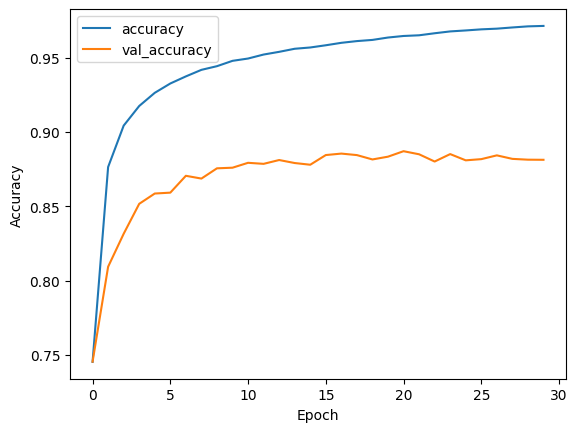

In [30]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

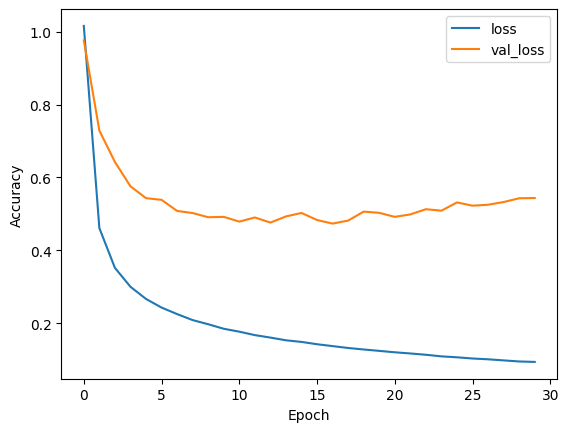

In [31]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [61]:
# Check Accuracy of the Model
loss ,acc= model.evaluate(test_images, test_labels)
print('Accuracy : ', acc)
print('Loss: ', loss)

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8824 - loss: 0.5267
Accuracy :  0.8812358975410461
Loss:  0.5434178709983826


The LeNet5 results show that after 1205 steps, the model achieved an accuracy of 88.24% on the training set, with a loss of 0.5267. The final accuracy on the evaluation set was approximately 88.12%, with a loss of 0.5434. These results indicate the model is performing well but still has room for improvement, especially in terms of reducing the loss further.

Switching to a custom AlexNet architecture could provide a stronger performance, as AlexNet is designed for deeper and more complex tasks than LeNet5, which may help in improving accuracy.

# AlexNet Model

In [43]:
def CustomAlexNet(input_shape, num_classes=49):
    model = tf.keras.Sequential()

    # Define Convolutional Layers
    # Conv 1
    model.add(tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(1, 1),
        activation='relu',
        padding='same',  # Add padding to preserve dimensions
        input_shape=input_shape
    ))
    model.add(tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ))

    # Conv 2
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu',
        padding='same',  # Add padding to preserve dimensions
    ))
    model.add(tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ))

    # Conv 3
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu',
        padding='same',  # Add padding to preserve dimensions
    )),

    # Conv 4
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu',
        padding='same',  # Add padding to preserve dimensions
    )),

    # Conv 5
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu',
        padding='same',  # Add padding to preserve dimensions
    )),
    model.add(tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    )),

    # Flatten Layer
    model.add(tf.keras.layers.Flatten())

    # Dense Layers
    model.add(tf.keras.layers.Dense(
        units=1024,
        activation='relu'
    )),
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(
        units=512,
        activation='relu'
    )),
    model.add(tf.keras.layers.Dropout(0.5))

    # Output Layer
    model.add(tf.keras.layers.Dense(
        units=num_classes,
        activation='softmax'
    )),

    return model

In [55]:
model_alexnet = CustomAlexNet((28, 28, 1), 49)

model_alexnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_alexnet.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 49)                  │          25,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,118,961 (8.08 MB)

 Trainable params: 2,118,961 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
hist = model_alexnet.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
)

Epoch 1/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.7097 - loss: 1.0973 - val_accuracy: 0.9089 - val_loss: 0.3433
Epoch 2/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9419 - loss: 0.2208 - val_accuracy: 0.9309 - val_loss: 0.2698
Epoch 3/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9550 - loss: 0.1705 - val_accuracy: 0.9345 - val_loss: 0.2598
Epoch 4/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9616 - loss: 0.1461 - val_accuracy: 0.9399 - val_loss: 0.2413
Epoch 5/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9643 - loss: 0.1370 - val_accuracy: 0.9406 - val_loss: 0.2413
Epoch 6/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9653 - loss: 0.1316 - val_accuracy: 0.9431 - val_loss: 0.2340
Epoch 7/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9653 - loss: 0.1308 - val_accuracy: 0.9379 - val_loss: 0.2651
Epoch 8/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9677 - loss: 0

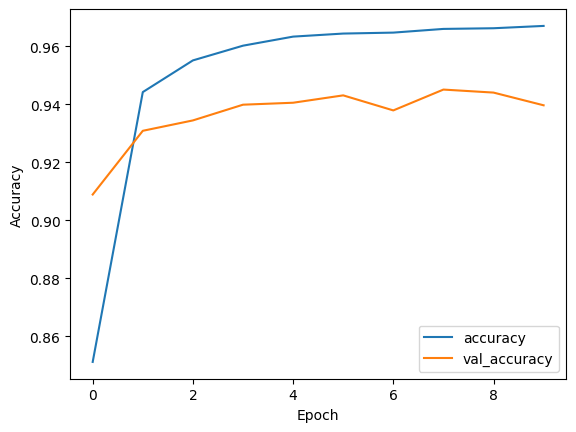

In [57]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

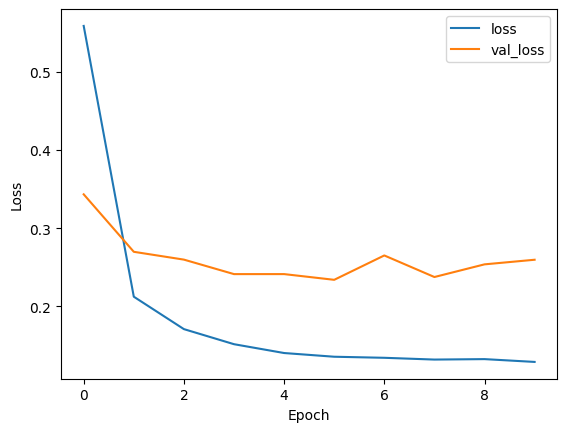

In [58]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [60]:
# Check Accuracy of the Model
loss ,acc= model_alexnet.evaluate(test_images, test_labels)
print('Accuracy : ', acc)
print('Loss: ', loss)

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9402 - loss: 0.2565
Accuracy :  0.9397099614143372
Loss:  0.25962698459625244


The Custom AlexNet results show that after 1205 steps, the model achieved a training accuracy of 94.02% with a much lower loss of 0.2565. The evaluation accuracy is similarly high at around 93.97%, with a loss of 0.2596.

These results suggest that the AlexNet architecture outperformed LeNet5, achieving higher accuracy and lower loss, indicating better generalization and convergence. The deeper architecture of AlexNet, with more layers and parameters, likely helped capture more complex features, resulting in the improved performance.

# Custom AlexNet Architecture

In [ ]:
# !pip install visualkeras

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


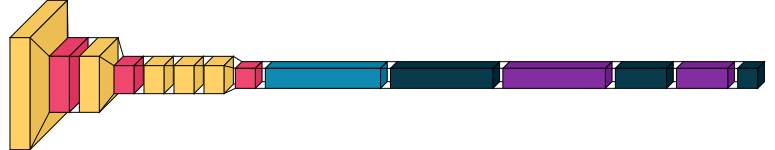

In [63]:
import visualkeras
visualkeras.layered_view(model_alexnet)